# Análise de dados de jogadores da NBA

Isabela Marinho Ribeiro (imr)

Lucas e Silva de Souza (lss8)

## Glossário das features

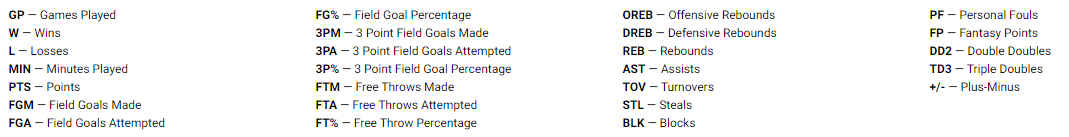

### Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
np.random.seed(10)

from sklearn.preprocessing import MinMaxScaler

### Importando o dataset

In [60]:
df = pd.read_csv('NBA_Players_Stats.csv', sep=';')

In [61]:
df_main = pd.read_csv('NBA_Players_Stats.csv', sep=';')

In [62]:
df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,AJ Griffin,ATL,20,20,8,12,170.7,48,18,62,...,18,5,8,1,2,6,78,0,0,-51
1,Bogdan Bogdanovic,ATL,31,79,35,44,2401.4,1333,471,1100,...,272,247,112,96,26,179,2284,1,0,127
2,Bruno Fernando,ATL,25,45,20,25,682.3,282,109,187,...,193,46,44,25,28,107,698,0,0,-96
3,Clint Capela,ATL,29,73,33,40,1883.1,836,353,618,...,776,91,74,43,106,164,2277,38,0,-17
4,De'Andre Hunter,ATL,26,57,26,31,1681.1,891,304,663,...,222,87,83,40,16,146,1373,3,0,-49


In [63]:
df.shape

(571, 29)

### Definição de tipos

In [64]:
df.dtypes

PLAYER     object
TEAM       object
AGE         int64
GP          int64
W           int64
L           int64
MIN       float64
PTS         int64
FGM         int64
FGA         int64
FG%       float64
3PM         int64
3PA         int64
3P%       float64
FTM         int64
FTA         int64
FT%       float64
OREB        int64
DREB        int64
REB         int64
AST         int64
TOV         int64
STL         int64
BLK         int64
PF          int64
FP          int64
DD2         int64
TD3         int64
+/-         int64
dtype: object

In [65]:
df['TEAMID'] = df['TEAM'].astype('category')

In [66]:
df['TEAMID'] = df['TEAMID'].cat.codes

In [67]:
df[['TEAM','TEAMID']]

,TEAM,TEAMID
0,ATL,0
1,ATL,0
2,ATL,0
3,ATL,0
4,ATL,0
...,...,...
566,WAS,29
567,WAS,29
568,WAS,29
569,WAS,29


### Limpeza de dados

#### Remoção aleatória de dados para tratar dados ausentes

In [68]:
df.isnull().any()

PLAYER    False
TEAM      False
AGE       False
GP        False
W         False
L         False
MIN       False
PTS       False
FGM       False
FGA       False
FG%       False
3PM       False
3PA       False
3P%       False
FTM       False
FTA       False
FT%       False
OREB      False
DREB      False
REB       False
AST       False
TOV       False
STL       False
BLK       False
PF        False
FP        False
DD2       False
TD3       False
+/-       False
TEAMID    False
dtype: bool

In [69]:
nan_indices = np.random.choice(df.index, 30, replace=False)
df.loc[nan_indices, 'PTS'] = np.nan

nulldf = df[df['PTS'].isna()]
nulldf.PTS

11    NaN
17    NaN
43    NaN
46    NaN
56    NaN
61    NaN
74    NaN
81    NaN
112   NaN
139   NaN
157   NaN
179   NaN
210   NaN
212   NaN
219   NaN
230   NaN
234   NaN
241   NaN
305   NaN
323   NaN
334   NaN
343   NaN
365   NaN
407   NaN
413   NaN
442   NaN
455   NaN
459   NaN
461   NaN
481   NaN
Name: PTS, dtype: float64

In [70]:
df['PPG'] = df['PTS']/df['GP']
df.head(10)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,TEAMID,PPG
0,AJ Griffin,ATL,20,20,8,12,170.7,48.0,18,62,...,8,1,2,6,78,0,0,-51,0,2.400000
1,Bogdan Bogdanovic,ATL,31,79,35,44,2401.4,1333.0,471,1100,...,112,96,26,179,2284,1,0,127,0,16.873418
2,Bruno Fernando,ATL,25,45,20,25,682.3,282.0,109,187,...,44,25,28,107,698,0,0,-96,0,6.266667
3,Clint Capela,ATL,29,73,33,40,1883.1,836.0,353,618,...,74,43,106,164,2277,38,0,-17,0,11.452055
4,De'Andre Hunter,ATL,26,57,26,31,1681.1,891.0,304,663,...,83,40,16,146,1373,3,0,-49,0,15.631579
5,Dejounte Murray,ATL,27,78,34,44,2783.3,1753.0,672,1463,...,201,111,24,138,3209,20,1,-154,0,22.474359
6,Dylan Windler,ATL,27,17,9,8,108.4,43.0,15,30,...,2,2,0,6,81,0,0,-16,0,2.529412
7,Garrison Mathews,ATL,27,66,29,37,992.1,325.0,103,226,...,19,20,8,115,556,0,0,-97,0,4.924242
8,Jalen Johnson,ATL,22,56,27,29,1888.9,896.0,359,702,...,101,67,47,133,2027,19,1,-76,0,16.000000
9,Kobe Bufkin,ATL,20,17,8,9,196.0,81.0,34,92,...,10,7,5,20,187,0,0,-35,0,4.764706


In [71]:
df.PPG.describe()

count    541.000000
mean       8.597213
std        6.848514
min        0.000000
25%        3.571429
50%        6.589744
75%       12.059524
max       34.692308
Name: PPG, dtype: float64

In [72]:
df.PTS.describe()

count     541.000000
mean      503.260628
std       514.594339
min         0.000000
25%        82.000000
50%       320.000000
75%       795.000000
max      2370.000000
Name: PTS, dtype: float64

#### Tratamento de dados ausentes

In [73]:
# Duplicating datasets for multiple analysis
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()

In [74]:
df2.head(50)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,TEAMID,PPG
0,AJ Griffin,ATL,20,20,8,12,170.7,48.0,18,62,...,8,1,2,6,78,0,0,-51,0,2.400000
1,Bogdan Bogdanovic,ATL,31,79,35,44,2401.4,1333.0,471,1100,...,112,96,26,179,2284,1,0,127,0,16.873418
2,Bruno Fernando,ATL,25,45,20,25,682.3,282.0,109,187,...,44,25,28,107,698,0,0,-96,0,6.266667
3,Clint Capela,ATL,29,73,33,40,1883.1,836.0,353,618,...,74,43,106,164,2277,38,0,-17,0,11.452055
4,De'Andre Hunter,ATL,26,57,26,31,1681.1,891.0,304,663,...,83,40,16,146,1373,3,0,-49,0,15.631579
5,Dejounte Murray,ATL,27,78,34,44,2783.3,1753.0,672,1463,...,201,111,24,138,3209,20,1,-154,0,22.474359
6,Dylan Windler,ATL,27,17,9,8,108.4,43.0,15,30,...,2,2,0,6,81,0,0,-16,0,2.529412
7,Garrison Mathews,ATL,27,66,29,37,992.1,325.0,103,226,...,19,20,8,115,556,0,0,-97,0,4.924242
8,Jalen Johnson,ATL,22,56,27,29,1888.9,896.0,359,702,...,101,67,47,133,2027,19,1,-76,0,16.000000
9,Kobe Bufkin,ATL,20,17,8,9,196.0,81.0,34,92,...,10,7,5,20,187,0,0,-35,0,4.764706


##### MEDIA

In [75]:
def generatePTS_values(row):
  return round(df.PPG.mean() * row['GP'])

df.loc[df['PTS'].isna(), 'PTS'] = df[df['PTS'].isna()].apply(generatePTS_values,axis=1)

In [76]:
df = df.fillna(df.PPG.mean())

In [77]:
df.head(50)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,TEAMID,PPG
0,AJ Griffin,ATL,20,20,8,12,170.7,48.0,18,62,...,8,1,2,6,78,0,0,-51,0,2.400000
1,Bogdan Bogdanovic,ATL,31,79,35,44,2401.4,1333.0,471,1100,...,112,96,26,179,2284,1,0,127,0,16.873418
2,Bruno Fernando,ATL,25,45,20,25,682.3,282.0,109,187,...,44,25,28,107,698,0,0,-96,0,6.266667
3,Clint Capela,ATL,29,73,33,40,1883.1,836.0,353,618,...,74,43,106,164,2277,38,0,-17,0,11.452055
4,De'Andre Hunter,ATL,26,57,26,31,1681.1,891.0,304,663,...,83,40,16,146,1373,3,0,-49,0,15.631579
5,Dejounte Murray,ATL,27,78,34,44,2783.3,1753.0,672,1463,...,201,111,24,138,3209,20,1,-154,0,22.474359
6,Dylan Windler,ATL,27,17,9,8,108.4,43.0,15,30,...,2,2,0,6,81,0,0,-16,0,2.529412
7,Garrison Mathews,ATL,27,66,29,37,992.1,325.0,103,226,...,19,20,8,115,556,0,0,-97,0,4.924242
8,Jalen Johnson,ATL,22,56,27,29,1888.9,896.0,359,702,...,101,67,47,133,2027,19,1,-76,0,16.000000
9,Kobe Bufkin,ATL,20,17,8,9,196.0,81.0,34,92,...,10,7,5,20,187,0,0,-35,0,4.764706


##### MEDIANA

In [79]:
def generatePTS2_values(row):
  return round(df2.PPG.median() * row['GP'])

df2.loc[df2['PTS'].isna(), 'PTS'] = df2[df2['PTS'].isna()].apply(generatePTS2_values,axis=1)

In [80]:
df2 = df2.fillna(df2.PPG.mean())

In [81]:
df2.head(50)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,TEAMID,PPG
0,AJ Griffin,ATL,20,20,8,12,170.7,48.0,18,62,...,8,1,2,6,78,0,0,-51,0,2.400000
1,Bogdan Bogdanovic,ATL,31,79,35,44,2401.4,1333.0,471,1100,...,112,96,26,179,2284,1,0,127,0,16.873418
2,Bruno Fernando,ATL,25,45,20,25,682.3,282.0,109,187,...,44,25,28,107,698,0,0,-96,0,6.266667
3,Clint Capela,ATL,29,73,33,40,1883.1,836.0,353,618,...,74,43,106,164,2277,38,0,-17,0,11.452055
4,De'Andre Hunter,ATL,26,57,26,31,1681.1,891.0,304,663,...,83,40,16,146,1373,3,0,-49,0,15.631579
5,Dejounte Murray,ATL,27,78,34,44,2783.3,1753.0,672,1463,...,201,111,24,138,3209,20,1,-154,0,22.474359
6,Dylan Windler,ATL,27,17,9,8,108.4,43.0,15,30,...,2,2,0,6,81,0,0,-16,0,2.529412
7,Garrison Mathews,ATL,27,66,29,37,992.1,325.0,103,226,...,19,20,8,115,556,0,0,-97,0,4.924242
8,Jalen Johnson,ATL,22,56,27,29,1888.9,896.0,359,702,...,101,67,47,133,2027,19,1,-76,0,16.000000
9,Kobe Bufkin,ATL,20,17,8,9,196.0,81.0,34,92,...,10,7,5,20,187,0,0,-35,0,4.764706


##### Avaliação da inputação

In [82]:
# Extract the real and calculated values
real_values = df_main.loc[nan_indices, 'PTS'].values
calculated_values = df.loc[nan_indices, 'PTS'].values

# Calculate the mean error
mean_error = np.mean(np.abs(real_values - calculated_values))

mean_error

169.96666666666667

In [83]:
# Extract the real and calculated values
real_values = df_main.loc[nan_indices, 'PTS'].values
calculated_values = df2.loc[nan_indices, 'PTS'].values

# Calculate the mean error
median_error = np.mean(np.abs(real_values - calculated_values))

median_error

142.53333333333333

### Normalização

In [84]:
# TODO: definir se a escala é entre -1 e 1 ou 0 e 1
scaler = MinMaxScaler(feature_range=(0, 1))

In [85]:
df_normalized = df.drop(['PLAYER', 'TEAM', 'TEAMID'], axis=1)

In [86]:
df_normalized = pd.DataFrame(scaler.fit_transform(df_normalized), columns=df_normalized.columns)

In [87]:
df_normalized['PLAYER'] = df['PLAYER']
df_normalized['TEAM'] = df['TEAM']
df_normalized['TEAMID'] = df['TEAMID']

In [88]:
df_normalized.head(10)

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,BLK,PF,FP,DD2,TD3,+/-,PPG,PLAYER,TEAM,TEAMID
0,0.05,0.228916,0.125000,0.184615,0.056896,0.020253,0.021505,0.037530,0.388220,0.028011,...,0.007874,0.023622,0.016923,0.000000,0.000000,0.442586,0.069180,AJ Griffin,ATL,0
1,0.60,0.939759,0.546875,0.676923,0.803474,0.562447,0.562724,0.665860,0.572959,0.672269,...,0.102362,0.704724,0.495552,0.012987,0.000000,0.577947,0.486373,Bogdan Bogdanovic,ATL,0
2,0.30,0.530120,0.312500,0.384615,0.228120,0.118987,0.130227,0.113196,0.780455,0.000000,...,0.110236,0.421260,0.151443,0.000000,0.000000,0.408365,0.180636,Bruno Fernando,ATL,0
3,0.50,0.867470,0.515625,0.615385,0.630008,0.352743,0.421744,0.374092,0.764391,0.000000,...,0.417323,0.645669,0.494033,0.493506,0.000000,0.468441,0.330104,Clint Capela,ATL,0
4,0.35,0.674699,0.406250,0.476923,0.562402,0.375949,0.363202,0.401332,0.614458,0.327731,...,0.062992,0.574803,0.297895,0.038961,0.000000,0.444106,0.450578,De'Andre Hunter,ATL,0
5,0.40,0.927711,0.531250,0.676923,0.931290,0.739662,0.802867,0.885593,0.614458,0.563025,...,0.094488,0.543307,0.696246,0.259740,0.038462,0.364259,0.647820,Dejounte Murray,ATL,0
6,0.40,0.192771,0.140625,0.123077,0.036045,0.018143,0.017921,0.018160,0.669344,0.036415,...,0.000000,0.023622,0.017574,0.000000,0.000000,0.469202,0.072910,Dylan Windler,ATL,0
7,0.40,0.783133,0.453125,0.569231,0.331805,0.137131,0.123059,0.136804,0.610442,0.238095,...,0.031496,0.452756,0.120634,0.000000,0.000000,0.407605,0.141940,Garrison Mathews,ATL,0
8,0.15,0.662651,0.421875,0.446154,0.631949,0.378059,0.428913,0.424939,0.684070,0.198880,...,0.185039,0.523622,0.439792,0.246753,0.038462,0.423574,0.461197,Jalen Johnson,ATL,0
9,0.05,0.192771,0.125000,0.138462,0.065364,0.034177,0.040621,0.055690,0.495315,0.025210,...,0.019685,0.078740,0.040573,0.000000,0.000000,0.454753,0.137342,Kobe Bufkin,ATL,0


### Discretização

In [89]:
df_normalized['PPG_DIS'] = pd.cut(df_normalized['PPG'],10)

In [90]:
df_normalized['PPG_DIS'].value_counts()

PPG_DIS
(0.1, 0.2]       157
(-0.001, 0.1]    131
(0.2, 0.3]       118
(0.3, 0.4]        58
(0.4, 0.5]        39
(0.5, 0.6]        24
(0.6, 0.7]        24
(0.7, 0.8]        15
(0.8, 0.9]         3
(0.9, 1.0]         2
Name: count, dtype: int64

In [91]:
df_normalized['PPG'].describe()

count    571.000000
mean       0.247813
std        0.192142
min        0.000000
25%        0.107488
50%        0.198342
75%        0.329846
max        1.000000
Name: PPG, dtype: float64

### Limpeza de Dados

#### Detecção de registros replicados

In [92]:
df[df.duplicated()].sort_values("PLAYER").head()

# To remove use code below
# df.drop_duplicates(keep = False, inplace = True)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,TEAMID,PPG


#### Outliers Univariados (3PM)

In [102]:
df['3PM'].describe()

count    571.000000
mean      55.119089
std       63.577138
min        0.000000
25%        3.000000
50%       28.000000
75%       87.500000
max      357.000000
Name: 3PM, dtype: float64

<Axes: >

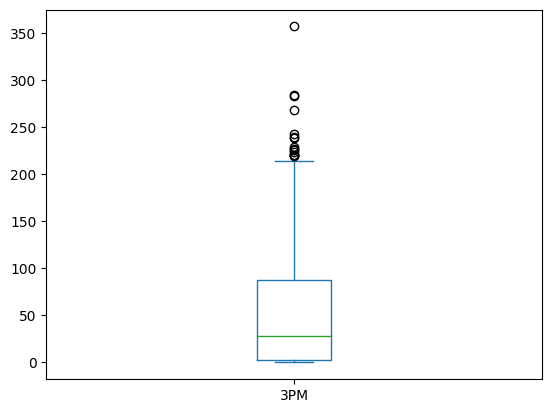

In [103]:
df['3PM'].plot.box()

<Axes: >

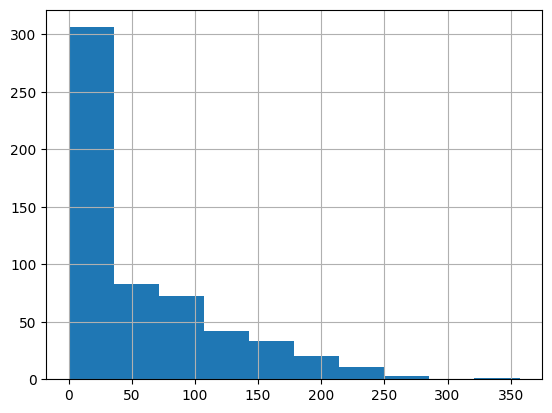

In [104]:
df['3PM'].hist()

In [105]:
from numpy import abs
mad = abs(df['3PM'] - df['3PM'].median()).median()*(1/0.6745)
print(mad)

41.51223128243143


<Axes: >

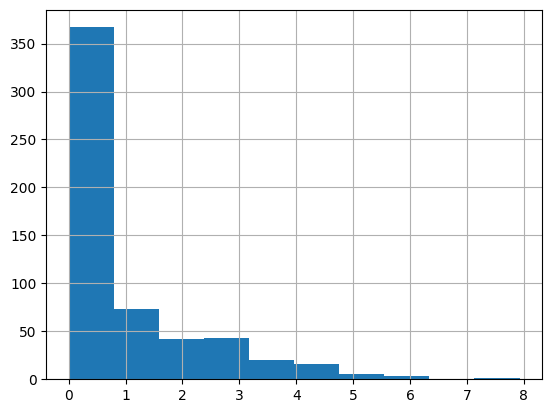

In [106]:
(abs(df['3PM']-df['3PM'].median())/mad).hist()

In [116]:
df[abs(df['3PM']-df['3PM'].median())/mad > 3.5][['PLAYER', 'TEAM', '3PM']]

,PLAYER,TEAM,3PM
1,Bogdan Bogdanovic,ATL,240
5,Dejounte Murray,ATL,201
14,Trae Young,ATL,175
32,Mikal Bridges,BKN,220
37,Derrick White,BOS,196
42,Jayson Tatum,BOS,229
50,Sam Hauser,BOS,197
55,Brandon Miller,CHA,184
80,Coby White,CHI,209
98,Donovan Mitchell,CLE,182


#### Outliers Bivariados (PPG)

In [93]:
df['PPG'].describe()

count    571.000000
mean       8.597213
std        6.665854
min        0.000000
25%        3.729021
50%        6.880952
75%       11.443133
max       34.692308
Name: PPG, dtype: float64

<Axes: >

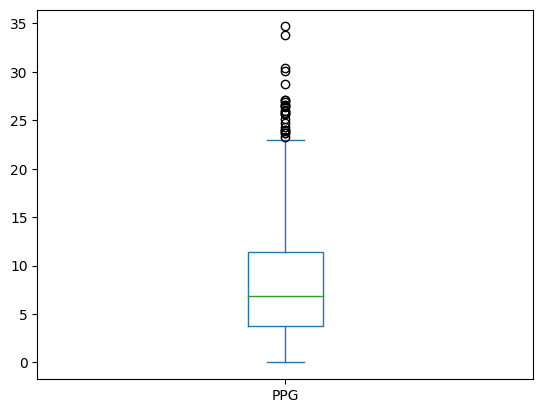

In [94]:
df['PPG'].plot.box()

<Axes: >

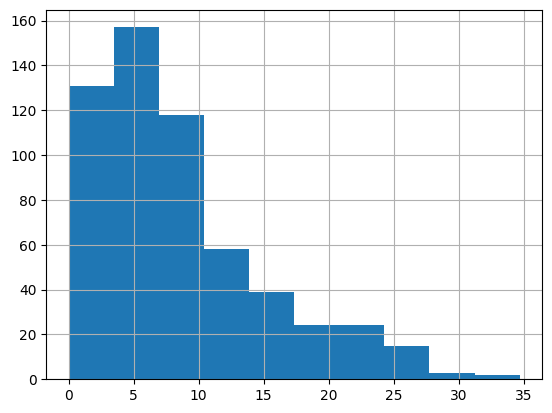

In [95]:
df['PPG'].hist()

In [118]:
from numpy import abs
mad2 = abs(df['PPG'] - df['PPG'].median()).median()*(1/0.6745)
print(mad2)

5.290515019944228


<Axes: >

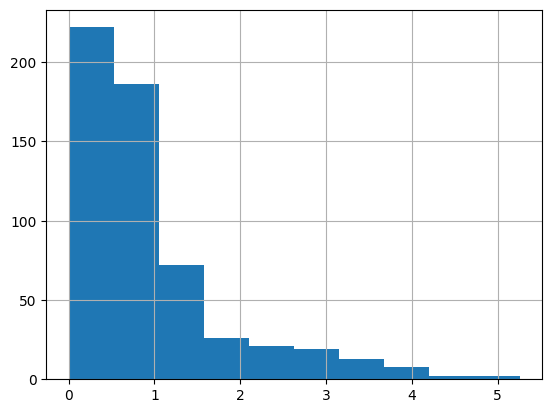

In [119]:
(abs(df['PPG']-df['PPG'].median())/mad2).hist()

In [120]:
df[abs(df['PPG']-df['PPG'].median())/mad2 > 3.5][['PLAYER', 'TEAM', 'PPG']]

,PLAYER,TEAM,PPG
14,Trae Young,ATL,25.722222
42,Jayson Tatum,BOS,26.851351
98,Donovan Mitchell,CLE,26.600000
123,Kyrie Irving,DAL,25.637931
124,Luka Doncic,DAL,33.857143
143,Nikola Jokic,DEN,26.392405
186,Stephen Curry,GSW,26.432432
254,LeBron James,LAL,25.661972
314,Giannis Antetokounmpo,MIL,30.438356
326,Anthony Edwards,MIN,25.936709


## Análises preliminares

### Quem é o jogador que mais pontua?

In [ ]:
df.iloc[df.PTS.idxmax()]

PLAYER    Luka Doncic
TEAM              DAL
AGE                25
GP                 70
W                  46
L                  24
MIN            2624.0
PTS              2370
FGM               804
FGA              1652
FG%              48.7
3PM               284
3PA               744
3P%              38.2
FTM               478
FTA               608
FT%              78.6
OREB               59
DREB              588
REB               647
AST               686
TOV               282
STL                99
BLK                38
PF                149
FP               4304
DD2                49
TD3                21
+/-               319
Name: 124, dtype: object

### Qual é a média de pontos por jogo desse jogador?

In [ ]:
df.PTS.iloc[df.PTS.idxmax()] / df.GP.iloc[df.PTS.idxmax()]

33.857142857142854

### Quem é o jogador que menos pontua e qual sua média de pontos por jogo?

In [ ]:
df.iloc[df.PTS.idxmin()]

PLAYER    Andrew Funk
TEAM              CHI
AGE                24
GP                  5
W                   3
L                   2
MIN              13.4
PTS                 0
FGM                 0
FGA                 4
FG%               0.0
3PM                 0
3PA                 3
3P%               0.0
FTM                 0
FTA                 0
FT%               0.0
OREB                0
DREB                0
REB                 0
AST                 0
TOV                 0
STL                 1
BLK                 1
PF                  0
FP                  6
DD2                 0
TD3                 0
+/-                 4
Name: 78, dtype: object

In [ ]:
df.PTS.iloc[df.PTS.idxmin()] / df.GP.iloc[df.PTS.idxmin()]

0.0

### Qual jogador mais jogou em minutos?

In [ ]:
df.iloc[df.MIN.idxmax()]

PLAYER    DeMar DeRozan
TEAM                CHI
AGE                  34
GP                   79
W                    37
L                    42
MIN              2988.6
PTS                1897
FGM                 650
FGA                1355
FG%                48.0
3PM                  75
3PA                 225
3P%                33.3
FTM                 522
FTA                 612
FT%                85.3
OREB                 43
DREB                297
REB                 340
AST                 421
TOV                 135
STL                  90
BLK                  45
PF                  161
FP                 3207
DD2                   7
TD3                   0
+/-                 -62
Name: 82, dtype: object

### Qual a média de minutos jogados por partida para esse jogador?

In [ ]:
df.MIN.iloc[df.MIN.idxmax()] / df.GP.iloc[df.MIN.idxmax()]

37.83037974683544